### Exploring Splitting with Gini Index and Entropy
- This will be repurposed from Decision Tree Classifiers

In [1]:
from dataclasses import dataclass
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
X,y = data['data'], data['target']

### Implementing Equation 18.5 

The goal of a Decision Tree is to find feature $j_i$ and threshold $t_i$ that minimizes the weighted sum of the cost of Left Subtree $c(D^L_i(j,t))$ and Right Subtree $c(D^R_i(j,t))$

Or more precisely
> $(j_i, t_i) = \arg \min_{j \in \{1,..,D\}} \min_{t \in T_j} \frac{|D^L_i (j,t)|}{|D_i|} c(D^L_i(j,t)) + \frac{|D^R_i (j,t)|}{|D_i|} c(D^R_i(j,t))$

We're implementing the equation above.

### Gini Index 

For classification, we first compute the empirical distribution over class labels for this node: 

> $\hat{\pi_{ic}} = \frac{1}{ | D_i |} \sum_{n \in D_i}\mathbb{ I(y_n = c) }$

Given this, we can then compute the **Gini Index**

> $G_i = \sum_{c=1}^{C} \hat{\pi_{ic}} (1 - \hat{\pi_{ic}}) = \sum_{c=1}^C \hat{\pi_{ic}} - \sum_{c=1}^C \hat{\pi_{ic}}^2 = 1 - \sum_{c=1} \hat{\pi_{ic}}^2$

### TODO
- Investigate if the masking methods that was used on Decision Tree Regressor is also appropriate with Decision Tree Classifier.
- Investigate if it makes more sense to One-Hot encode the classes or use Ordinal Methods instead. (Things are obvious based from the plot)

In [7]:
feat_index = 0

thresh = np.unique(X[:,feat_index]).reshape(1,-1)
selected_feat = X[:,feat_index].reshape(-1,1)
is_left_sampler = (selected_feat <= thresh)
is_right_sampler = ~is_left_sampler

print(is_left_sampler.shape)
print(is_right_sampler.shape)

(150, 35)
(150, 35)


In [8]:
def one_hot_encode(y):
    num_cats = np.unique(y).shape[0]
    return np.eye(num_cats)[y], num_cats

y_one_hot, num_cats = one_hot_encode(y)
print('y_one_hot.shape = ', y_one_hot.shape)
print('num_cats = ', num_cats)

y_one_hot.shape =  (150, 3)
num_cats =  3


In [9]:
num_thresh = is_left_sampler.shape[1]
y_oh_3d = np.stack(num_thresh * [y_one_hot], axis=1)
print(y_oh_3d.shape)

(150, 35, 3)


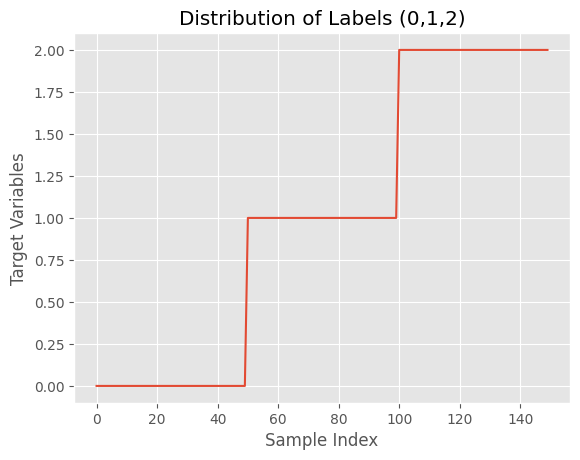

In [10]:
import matplotlib.pyplot as plt

figsize=(7,5)

plt.style.use('ggplot')
plt.plot(np.arange(y.shape[0]), y)
plt.title('Distribution of Labels (0,1,2)')
plt.xlabel('Sample Index')
plt.ylabel('Target Variables')
plt.show()

In [11]:
is_left_sampler_3d = np.stack(num_cats * [ is_left_sampler ], axis=2)
is_right_sampler_3d = np.stack(num_cats * [ is_right_sampler ], axis=2)

print(is_left_sampler_3d.shape)
print(is_right_sampler_3d.shape)

(150, 35, 3)
(150, 35, 3)


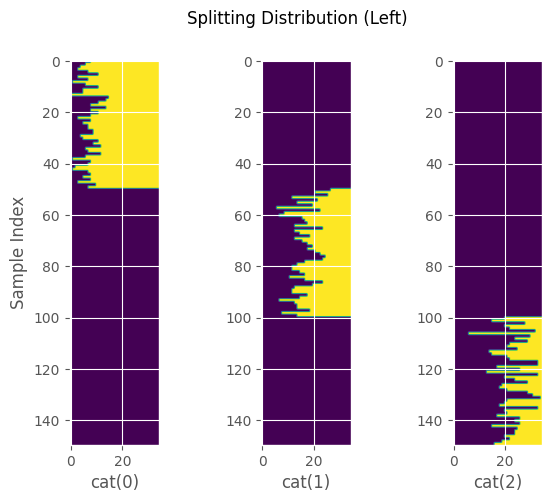

In [12]:
sampled_left = is_left_sampler_3d * y_oh_3d
sampled_right = is_right_sampler_3d * y_oh_3d

figsize = (7, 5)
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=figsize)
axs1.imshow(sampled_left[:,:,0])
axs1.set_xlabel('cat(0)')
axs1.set_ylabel('Sample Index')
axs2.imshow(sampled_left[:,:,1])
axs2.set_xlabel('cat(1)')
axs3.imshow(sampled_left[:,:,2])
axs3.set_xlabel('cat(2)')
plt.style.use('ggplot')
plt.suptitle('Splitting Distribution (Left)')
plt.show()

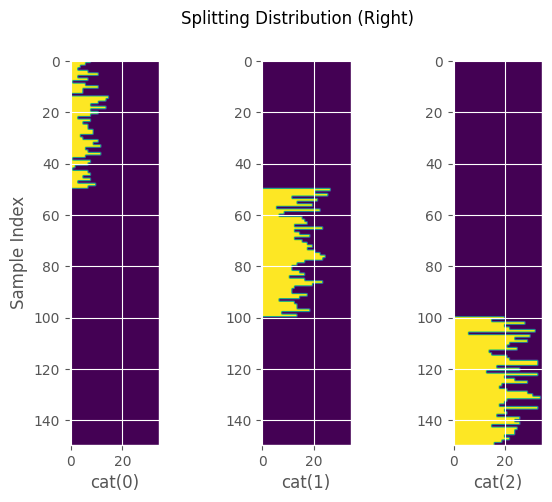

In [13]:
figsize = (7, 5)
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=figsize)
axs1.imshow(sampled_right[:,:,0])
axs1.set_xlabel('cat(0)')
axs1.set_ylabel('Sample Index')
axs2.imshow(sampled_right[:,:,1])
axs2.set_xlabel('cat(1)')
axs3.imshow(sampled_right[:,:,2])
axs3.set_xlabel('cat(2)')
plt.style.use('ggplot')
plt.suptitle('Splitting Distribution (Right)')
plt.show()

### We want to compute Gini Index 

For classification, we first compute the empirical distribution over class labels for this node: 

> $\hat{\pi_{ic}} = \frac{1}{ | D_i |} \sum_{n \in D_i}\mathbb{ I(y_n = c) }$

Given this, we can then compute the **Gini Index**

> $G_i = \sum_{c=1}^{C} \hat{\pi_{ic}} (1 - \hat{\pi_{ic}}) = \sum_{c=1}^C \hat{\pi_{ic}} - \sum_{c=1}^C \hat{\pi_{ic}}^2 = 1 - \sum_{c=1} \hat{\pi_{ic}}^2$

### Question
How to calculate $| D_i |$ first?

#### Answer
Take the sum of `is_left_sampler` and `is_right_sampler` along the row axis (`axis=0`)

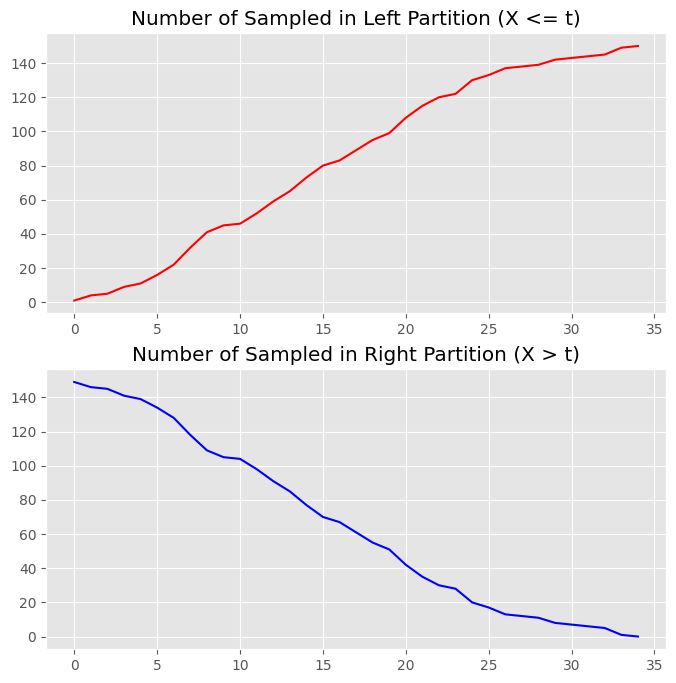

is_left_sampler.shape =  (150, 35)
num_sampled_left.shape =  (35, 3)

is_right_sampler.shape =  (150, 35)
num_sampled_right.shape =  (35, 3)


In [36]:
num_sampled_left = np.sum(is_left_sampler, axis=0)
num_sampled_right = np.sum(is_right_sampler, axis=0)

figsize=(8,8)
fig, (axs1, axs2) = plt.subplots(2,1, figsize=figsize)

axs1.plot(np.arange(num_sampled_left.shape[0]), num_sampled_left, color='red')
axs1.set_title('Number of Sampled in Left Partition (X <= t)')
axs2.plot(np.arange(num_sampled_right.shape[0]), num_sampled_right, color='blue')
axs2.set_title('Number of Sampled in Right Partition (X > t)')
plt.show()

num_sampled_left = np.stack( num_cats *[ num_sampled_left ], axis=1) 
num_sampled_right = np.stack( num_cats *[ num_sampled_right ], axis=1) 

print('is_left_sampler.shape = ', is_left_sampler.shape)
print('num_sampled_left.shape = ', num_sampled_left.shape)
print('')

print('is_right_sampler.shape = ', is_right_sampler.shape)
print('num_sampled_right.shape = ', num_sampled_right.shape)

In [16]:
print('sampled_left.shape = ', sampled_left.shape)
print('sampled_right.shape = ', sampled_right.shape)

sampled_left.shape =  (150, 35, 3)
sampled_right.shape =  (150, 35, 3)


### Implementing
Implementing the Probability of each Classes

$\hat{\pi_{ic}} = \frac{1}{ | D_i |} \sum_{n \in D_i}\mathbb{ I(y_n = c) }$



prob_class_left.shape =  (35, 3)
prob_class_right.shape =  (35, 3)


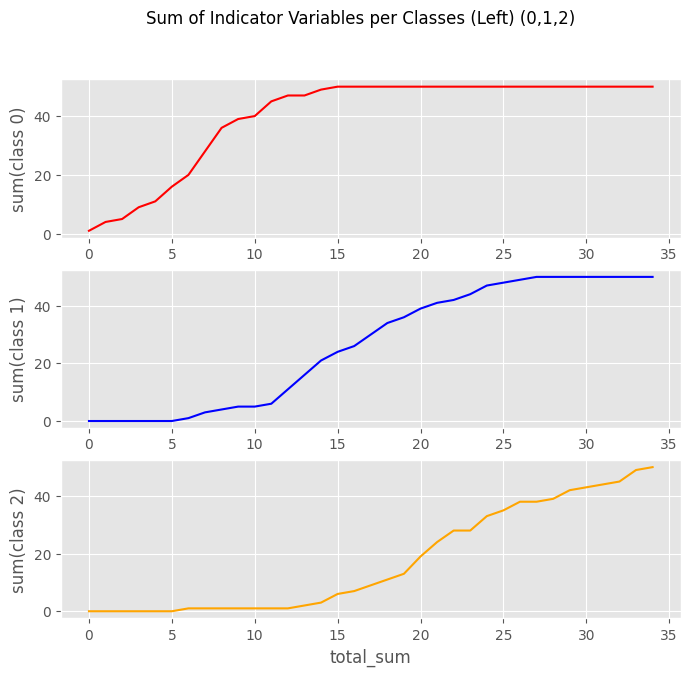

In [37]:
prob_class_left = np.sum(sampled_left, axis=0)
prob_class_right = np.sum(sampled_right, axis=0)

print('prob_class_left.shape = ', prob_class_left.shape)
print('prob_class_right.shape = ', prob_class_right.shape)

figsize = (8, 7)
fig, (axs1, axs2, axs3) = plt.subplots(3, 1, figsize=figsize)
axs1.plot(np.arange(prob_class_left.shape[0]), prob_class_left[:,0], color='red')
axs1.set_ylabel('sum(class 0)')

axs2.plot(np.arange(prob_class_left.shape[0]), prob_class_left[:,1], color='blue')
axs2.set_ylabel('sum(class 1)')

axs3.plot(np.arange(prob_class_left.shape[0]), prob_class_left[:,2], color='orange')
axs3.set_ylabel('sum(class 2)')
axs3.set_xlabel('total_sum')

plt.style.use('ggplot')
plt.suptitle('Sum of Indicator Variables per Classes (Left) (0,1,2)')
plt.show()

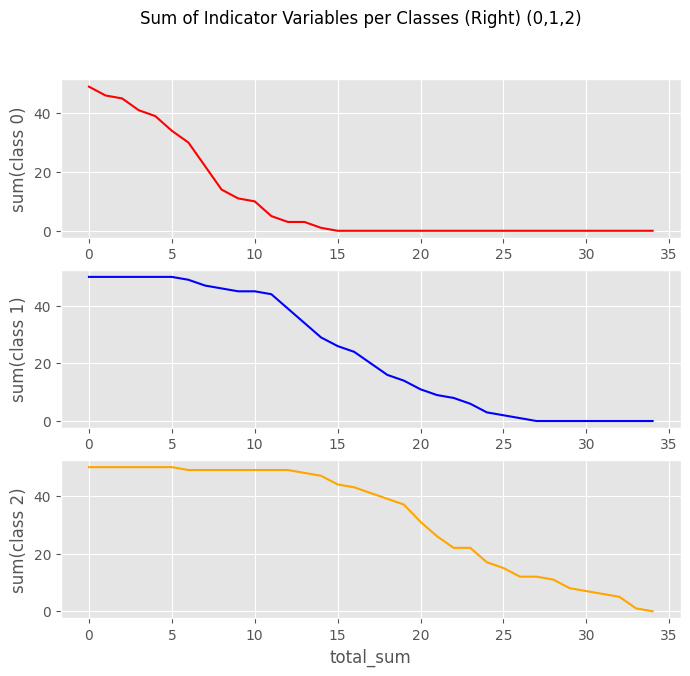

In [38]:
figsize = (8, 7)
fig, (axs1, axs2, axs3) = plt.subplots(3, 1, figsize=figsize)
axs1.plot(np.arange(prob_class_left.shape[0]), prob_class_right[:,0], color='red')
axs1.set_ylabel('sum(class 0)')

axs2.plot(np.arange(prob_class_left.shape[0]), prob_class_right[:,1], color='blue')
axs2.set_ylabel('sum(class 1)')

axs3.plot(np.arange(prob_class_left.shape[0]), prob_class_right[:,2], color='orange')
axs3.set_ylabel('sum(class 2)')
axs3.set_xlabel('total_sum')

plt.style.use('ggplot')
plt.suptitle('Sum of Indicator Variables per Classes (Right) (0,1,2)')
plt.show()

In [33]:
print('num_sampled_left.shape = ', num_sampled_left.shape)
print('prob_class_left.shape = ', prob_class_left.shape)

print('num_sampled_right.shape = ', num_sampled_right.shape)
print('prob_class_right.shape = ', prob_class_right.shape)

num_sampled_left.shape =  (35,)
prob_class_left.shape =  (35, 3)
num_sampled_right.shape =  (35,)
prob_class_right.shape =  (35, 3)


### TODO
- Stack num_sampled_left and num_sampled_right per number of classes